In [1]:
import librosa
import numpy as np
from scipy.spatial.distance import cdist
from IPython.display import Audio
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time



In [2]:
# clip_1, sr = librosa.load("/Users/gunjack/Downloads/Test2egil.m4a",sr=22050)
# clip_2, sr = librosa.load("/Users/gunjack/Downloads/Test 2 angel.m4a",sr=22050)

clip_1, sr = librosa.load("/Users/gunjack/Downloads/Test 3 -angel.m4a",sr=22050)
clip_2, sr = librosa.load("/Users/gunjack/Downloads/Test3-egil.m4a",sr=22050)


# Display sample rate and audio duration
print(f"Sample rate: {sr} Hz")
print(f"Audio duration: {len(clip_1) / sr:.2f} seconds")
print(f"Audio duration: {len(clip_2) / sr:.2f} seconds")
print(len(clip_1))
print(len(clip_2))


/var/folders/r1/fbwkpcp91yg_kn1vfxr6p02m0000gn/T/ipykernel_5082/4120767378.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  clip_1, sr = librosa.load("/Users/gunjack/Downloads/Test 3 -angel.m4a",sr=22050)
/usr/local/Caskroom/miniconda/base/envs/hcktn/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sample rate: 22050 Hz
Audio duration: 60.01 seconds
Audio duration: 58.58 seconds
1323206
1291689


/var/folders/r1/fbwkpcp91yg_kn1vfxr6p02m0000gn/T/ipykernel_5082/4120767378.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  clip_2, sr = librosa.load("/Users/gunjack/Downloads/Test3-egil.m4a",sr=22050)
/usr/local/Caskroom/miniconda/base/envs/hcktn/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


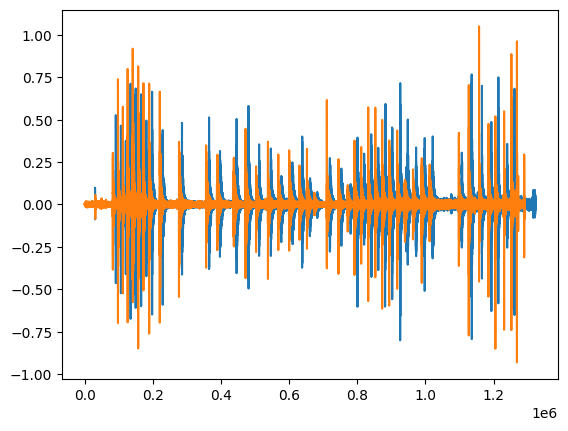

In [8]:
plt.plot(clip_1)
plt.plot(clip_2)
plt.show()


In [9]:
display(Audio(clip_1, rate=sr))
display(Audio(clip_2, rate=sr))

KeyboardInterrupt: 

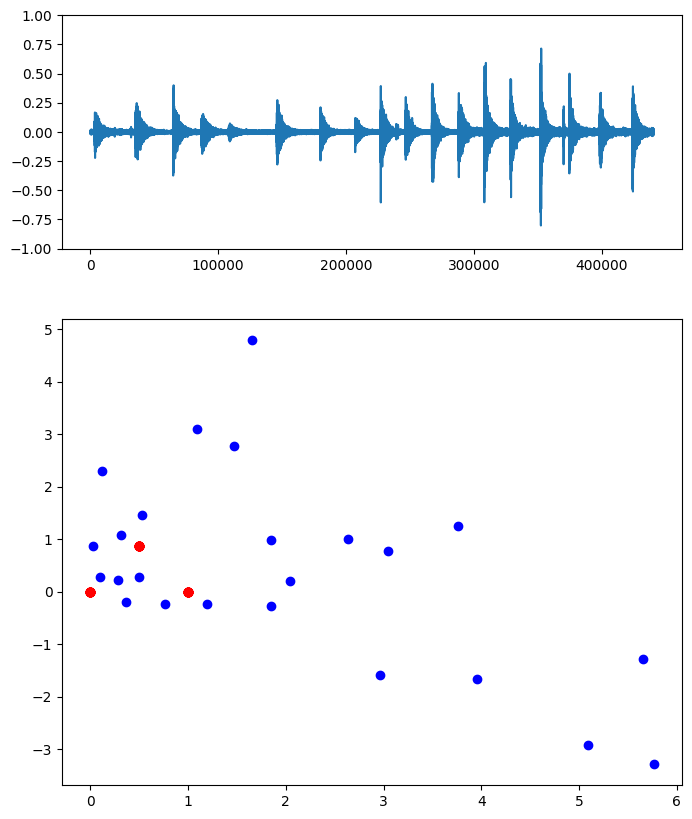

In [14]:
import random

def audio_stream(clip : np.array):
    for t,amp in enumerate(clip):
        yield amp,t
    
def frame_has_event(audio_frame : np.array):
    # Basic!! Is noise higher than threshold?
    if max(np.abs(audio_frame))>0.25:
        return True
    else:
        return True
    
def timestamp_of_event(audio_frame : np.array, t: np.long)->np.long:
    # Define "event" as the loudest point in the audio frame
    return t+np.argmax(audio_frame)


import numpy as np

def get_sound_position(time_1: float, 
                       time_2: float, 
                       time_3: float, 
                       speed_of_sound: float = 343.0,  # meters/second
                          mic_positions: dict = None
                      ) -> dict:
    
    if mic_positions is None:
        mic_positions = {
            'mic1': np.array([0, 0]),
            'mic2': np.array([1, 0]),
            'mic3': np.array([0.5, 0.866])  # Equilateral triangle
        }
    
    # Convert time differences to distance differences
    # Using first mic as reference
    d21 = (time_2 - time_1) * speed_of_sound
    d31 = (time_3 - time_1) * speed_of_sound
    
    # Get mic positions
    p1 = mic_positions['mic1']
    p2 = mic_positions['mic2']
    p3 = mic_positions['mic3']
    
    # Create matrices for solving system of equations
    A = np.array([
        [2*(p2[0] - p1[0]), 2*(p2[1] - p1[1])],
        [2*(p3[0] - p1[0]), 2*(p3[1] - p1[1])]
    ])
    
    # Distance equations
    b = np.array([
        d21**2 + np.sum(p1**2) - np.sum(p2**2),
        d31**2 + np.sum(p1**2) - np.sum(p3**2)
    ])
    
    # Solve for source position
    try:
        source_position = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        source_position = np.array([float('nan'), float('nan')])
    
    return {
        'mic1': mic_positions['mic1'],
        'mic2': mic_positions['mic2'],
        'mic3': mic_positions['mic3'],
        'source': source_position/100000000
    }

def sync_timestamps(my_timestamp):
    ## Todo send and sync the timestamps
    return {
        "time_1":my_timestamp,
        "time_2":my_timestamp+random.randint(1, 100), 
        "time_3":my_timestamp+random.randint(1, 100),
            }
    
def update_UI(coords):
    ax2.scatter([coords["mic1"][0]],  [coords["mic1"][1]],c='red')
    ax2.scatter([coords["mic2"][0]],  [coords["mic2"][1]],c='red')
    ax2.scatter([coords["mic3"][0]],  [coords["mic3"][1]],c='red')
    ax2.scatter([coords["source"][0]],[coords["source"][1]],c='blue')
    pass

from matplotlib import gridspec
fig = plt.figure(figsize=(8, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])  # 1:2 ratio makes bottom plot taller

# Create the subplots with custom dimensions
ax1 = plt.subplot(gs[0])  # Top plot
ax2 = plt.subplot(gs[1])  # Bottom plot, twice as tall

# Plot the static data on ax1 (top plot)
ax1.plot(clip_1)
ax1.set_ylim(-1, 1)

# Plot the static data on ax1 (top plot)
ax1.plot(clip_1)  # Or whatever static data you want to show
ax1.set_ylim(-1, 1)


window_length = sr * 2  # Take 5 second streams
audio_frame = []
for amp,t in audio_stream(clip_1):
    if t%window_length==0:
        if len(audio_frame)>=window_length:
            audio_frame = []
        else:
            audio_frame.append(amp)
            is_event = frame_has_event(audio_frame)
            if is_event:
                my_event_timestamp = timestamp_of_event(audio_frame,t)
                all_timestamps=sync_timestamps(my_event_timestamp)

                if None in all_timestamps.values():
                    # All remotes didn't
                    # - identify the event
                    # - It didn't happen in some of their windows
                    pass
                else:
                    coords = get_sound_position(**all_timestamps)
                    update_UI(coords)
            
            plot_size = sr * 20 # 20 seconds
            # print(t,plot_size)
            if t>plot_size:
                ax1.clear()  # Clear only the bottom plot
                ax1.set_ylim(-1, 1)
                ax1.plot(clip_1[(t-plot_size):t])
                display(fig)
                clear_output(wait=True)
                time.sleep(0.5)


In [6]:
# print(len(clip_1))
# print(len(clip_2))
    
# # clip_1 = clip_1[10000:-10000]
# # clip_2 = clip_1[10000:-10000]
# conv =np.convolve(clip_1,clip_2)
# best_offset = np.argmax(conv)  # Index of maximum correlation
# alignment_offset = best_offset - (len(clip_1) - 1)  # Adjust for clip_1 length

# if alignment_offset >= 0:
#     # clip_1 starts after clip_2
#     clip_2_aligned = clip_2[alignment_offset:alignment_offset+len(clip_1)]
#     clip_1_aligned = clip_1
# else:
#     # clip_1 starts before clip_2
#     clip_1_aligned = clip_1[-alignment_offset:-alignment_offset+len(clip_2)]
#     clip_2_aligned = clip_2
    
# plt.plot(clip_1_aligned, label='clip_1')
# plt.plot(clip_2_aligned, label='clip_2')
# plt.legend()
# plt.show()